Inception V3 Model for MNIST Dataset

Inception V3 : Inception v3 is a widely-used image recognition model that has been shown to attain greater than 78.1% accuracy on the ImageNet dataset.

Inception V3 Architecture : This architecture made up of symmetric and asymmetric building blocks, including convolutions, average pooling, max pooling, concats, dropouts, and fully connected layers. Batchnorm is used extensively throughout the model and applied to activation inputs. Loss is computed via Softmax. 

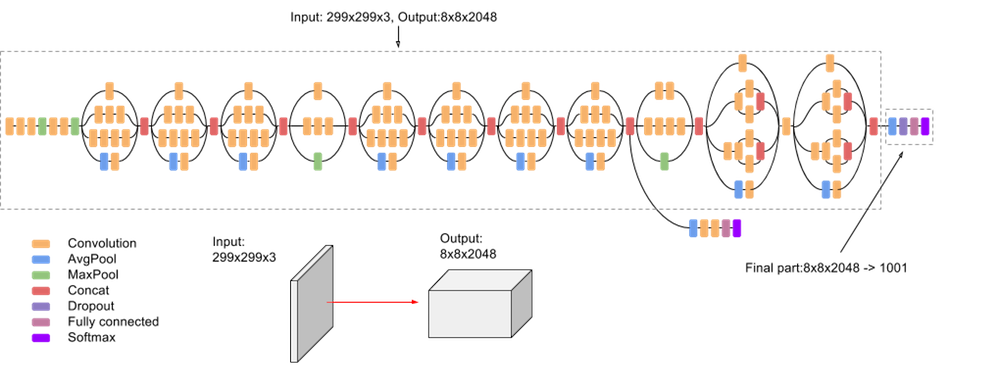

In [ ]:
%matplotlib inline  
import struct
from struct import unpack
from numpy import zeros, uint8, float32
from pylab import imshow, show, cm
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
from keras.models import Sequential, Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K



In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [ ]:
input_shape = (32,32, 3)
inputs = Input(shape=input_shape)

tower_1 = Conv2D(16, (3, 3), strides=(1, 1), padding='same', name = "inc1_conv1", activation='relu')(inputs)
tower_2 = Conv2D(16, (5, 5), strides=(1, 1), padding='same', name = "inc1_conv2", activation='relu')(inputs)
tower_3 = Conv2D(16, (7, 7), strides=(1, 1), padding='same', name = "inc1_conv3", activation='relu')(inputs)
tower_4 = Conv2D(16, (9, 9), strides=(1, 1), padding='same', name = "inc1_conv4", activation='relu')(inputs)
concat_1 = keras.layers.concatenate([tower_1, tower_2, tower_3, tower_4], axis=3, name = "inc1_concat")

reduce = Conv2D(16, (1, 1), strides=(1, 1), padding='same', name = "inc2_1by1_1")(concat_1)
tower_1 = Conv2D(32, (3, 3), strides=(1, 1), padding='same', name = "inc2_conv1", activation='relu')(reduce)

tower_2 = Conv2D(32, (5, 5), strides=(1, 1), padding='same', name = "inc2_conv2", activation='relu')(reduce)

tower_3 = Conv2D(32, (7, 7), strides=(1, 1), padding='same', name = "inc2_conv3", activation='relu')(reduce)

tower_4 = Conv2D(32, (9, 9), strides=(1, 1), padding='same', name = "inc2_conv4", activation='relu')(reduce)

concat_2 = keras.layers.concatenate([tower_1, tower_2, tower_3, tower_4], axis=3, name = "inc2_concat")
concat_2 = Conv2D(16, (1, 1), strides=(1, 1), padding='same', activation='relu', name = "conc_1x1_1")(concat_2)

flat = Flatten()(concat_2)
dense = Dense(128, activation='relu', name = "dense1")(flat)
dropout = Dropout(0.4)(dense)
outputs = Dense(num_classes, activation='softmax', name = "output")(dropout)

model = Model(inputs=inputs, outputs=outputs)

model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(),
              metrics=['accuracy'])

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size = 64
epochs = 10
history = model.fit(x_train,y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_val, y_val))

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [ ]:
model.evaluate(x_test, y_test)

Result : Got 98.75% accuracy 
Loss 4.90%
